In [1]:
import pandas as pd 
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
%matplotlib inline

In [2]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [3]:
movies = pd.read_csv("my_movies.csv")
movies

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


In [4]:
movies.isna().sum()

V1               0
V2               0
V3               3
V4               8
V5               9
Sixth Sense      0
Gladiator        0
LOTR1            0
Harry Potter1    0
Patriot          0
LOTR2            0
Harry Potter2    0
LOTR             0
Braveheart       0
Green Mile       0
dtype: int64

In [5]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   V1             10 non-null     object
 1   V2             10 non-null     object
 2   V3             7 non-null      object
 3   V4             2 non-null      object
 4   V5             1 non-null      object
 5   Sixth Sense    10 non-null     int64 
 6   Gladiator      10 non-null     int64 
 7   LOTR1          10 non-null     int64 
 8   Harry Potter1  10 non-null     int64 
 9   Patriot        10 non-null     int64 
 10  LOTR2          10 non-null     int64 
 11  Harry Potter2  10 non-null     int64 
 12  LOTR           10 non-null     int64 
 13  Braveheart     10 non-null     int64 
 14  Green Mile     10 non-null     int64 
dtypes: int64(10), object(5)
memory usage: 1.3+ KB


In [6]:
categorical_features= [feature for feature in movies.columns if movies[feature].dtypes=='O']
categorical_features

['V1', 'V2', 'V3', 'V4', 'V5']

In [7]:
numerical_features = [feature for feature in movies.columns if movies[feature].dtypes != 'O'] # list comprehension feature that are not equal to object type

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
movies[numerical_features].head()

Number of numerical variables:  10


,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0


In [8]:
Y = movies[numerical_features]
Y



,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0
5,1,1,0,0,1,0,0,0,0,0
6,0,0,0,1,0,0,1,0,0,0
7,0,1,0,0,1,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0
9,1,1,0,0,0,0,0,1,0,1


In [9]:
movies[categorical_features]

,V1,V2,V3,V4,V5
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2
1,Gladiator,Patriot,Braveheart,NaN,NaN
2,LOTR1,LOTR2,NaN,NaN,NaN
3,Gladiator,Patriot,Sixth Sense,NaN,NaN
4,Gladiator,Patriot,Sixth Sense,NaN,NaN
5,Gladiator,Patriot,Sixth Sense,NaN,NaN
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN
7,Gladiator,Patriot,NaN,NaN,NaN
8,Gladiator,Patriot,Sixth Sense,NaN,NaN
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN


In [10]:
movies.iloc[:,:5]

,V1,V2,V3,V4,V5
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2
1,Gladiator,Patriot,Braveheart,NaN,NaN
2,LOTR1,LOTR2,NaN,NaN,NaN
3,Gladiator,Patriot,Sixth Sense,NaN,NaN
4,Gladiator,Patriot,Sixth Sense,NaN,NaN
5,Gladiator,Patriot,Sixth Sense,NaN,NaN
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN
7,Gladiator,Patriot,NaN,NaN,NaN
8,Gladiator,Patriot,Sixth Sense,NaN,NaN
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN


In [11]:
categorical_features

['V1', 'V2', 'V3', 'V4', 'V5']

In [12]:

V1 = pd.get_dummies(movies["V1"])
V2 = pd.get_dummies(movies["V2"])
V3 = pd.get_dummies(movies["V3"])
V4 = pd.get_dummies(movies["V4"])
V5 = pd.get_dummies(movies["V5"])



In [13]:
new_movies = pd.concat([V1,V2,V3,V4,V5, Y], axis =1)
new_movies 


,Gladiator,Harry Potter1,LOTR1,Sixth Sense,Harry Potter2,LOTR,LOTR1,LOTR2,Patriot,Braveheart,...,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,0,0,0,1,0,0,1,0,0,0,...,1,0,1,1,0,1,0,0,0,1
1,1,0,0,0,0,0,0,0,1,1,...,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,1,0,...,1,1,0,0,1,0,0,0,0,0
4,1,0,0,0,0,0,0,0,1,0,...,1,1,0,0,1,0,0,0,0,0
5,1,0,0,0,0,0,0,0,1,0,...,1,1,0,0,1,0,0,0,0,0
6,0,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
7,1,0,0,0,0,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0
8,1,0,0,0,0,0,0,0,1,0,...,1,1,0,0,1,0,0,0,0,0
9,0,0,0,1,0,1,0,0,0,0,...,1,1,0,0,0,0,0,1,0,1


In [14]:
frequent_itemsets = apriori(new_movies , min_support = 0.0075, max_len = 4, use_colnames = True)  #how we decided min support ?
frequent_itemsets

,support,itemsets
0,0.6,(Gladiator)
1,0.1,(Harry Potter1)
2,0.1,(LOTR1)
3,0.2,(Sixth Sense)
4,0.1,(Harry Potter2)
...,...,...
647,0.1,"(Harry Potter1, Sixth Sense, LOTR2, LOTR1)"
648,0.1,"(Harry Potter1, Sixth Sense, Green Mile, LOTR1)"
649,0.1,"(Sixth Sense, LOTR2, Green Mile, LOTR1)"
650,0.1,"(Harry Potter1, LOTR2, Green Mile, Sixth Sense)"


In [15]:
# Most Frequent item sets based on support 
frequent_itemsets.sort_values('support', ascending = False, inplace = True)
frequent_itemsets

,support,itemsets
16,0.7,(Gladiator)
0,0.6,(Gladiator)
350,0.6,"(Patriot, Gladiator)"
140,0.6,"(Patriot, Gladiator)"
25,0.6,"(Patriot, Gladiator)"
...,...,...
259,0.1,"(Patriot, Braveheart, Gladiator)"
260,0.1,"(Braveheart, Gladiator)"
261,0.1,"(Patriot, Braveheart)"
262,0.1,"(Sixth Sense, Green Mile, Gladiator)"


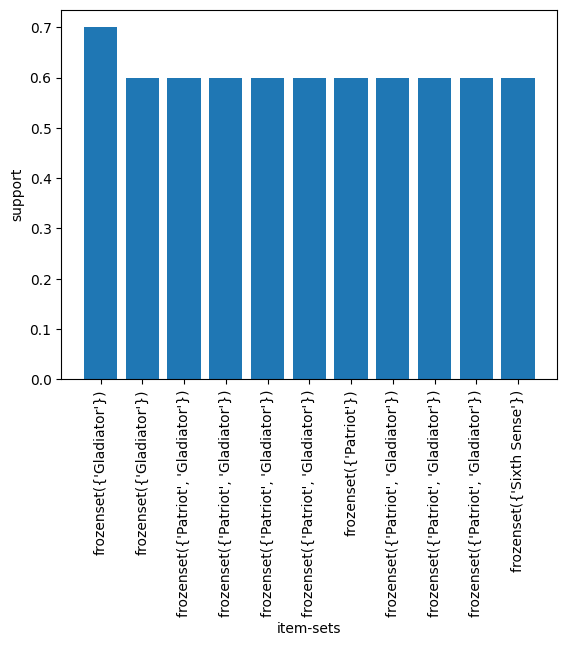

In [16]:
plt.bar(x = list(range(0, 11)), height = frequent_itemsets.support[0:11])
plt.xticks(list(range(0, 11)), frequent_itemsets.itemsets[0:11], rotation=90)
plt.xlabel('item-sets')
plt.ylabel('support')
plt.show()

In [17]:
rules = association_rules(frequent_itemsets, metric = "lift", min_threshold = 1)
rules.head(20)
rules.sort_values('lift', ascending = False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Patriot),(Gladiator),0.6,0.1,0.6,1.0,10.0,0.54,inf
126,"(LOTR1, Sixth Sense)","(Harry Potter1, Green Mile)",0.1,0.1,0.1,1.0,10.0,0.09,inf
128,(Harry Potter1),"(LOTR1, Green Mile, Sixth Sense)",0.1,0.1,0.1,1.0,10.0,0.09,inf
131,(LOTR1),"(Harry Potter1, Green Mile, Sixth Sense)",0.1,0.1,0.1,1.0,10.0,0.09,inf
132,"(LOTR, Green Mile)",(Gladiator),0.1,0.1,0.1,1.0,10.0,0.09,inf
134,"(Green Mile, Gladiator)",(LOTR),0.1,0.1,0.1,1.0,10.0,0.09,inf
135,(LOTR),"(Green Mile, Gladiator)",0.1,0.1,0.1,1.0,10.0,0.09,inf
137,(Gladiator),"(LOTR, Green Mile)",0.1,0.1,0.1,1.0,10.0,0.09,inf
138,"(LOTR, Sixth Sense)",(Gladiator),0.1,0.1,0.1,1.0,10.0,0.09,inf
139,"(Gladiator, Sixth Sense)",(LOTR),0.1,0.1,0.1,1.0,10.0,0.09,inf


In [18]:
def to_list(i):
    return (sorted(list(i)))

ma_X = rules.antecedents.apply(to_list) + rules.consequents.apply(to_list)
ma_X

0                   [Patriot, Gladiator]
1                   [Gladiator, Patriot]
2               [Sixth Sense, Gladiator]
3               [Gladiator, Sixth Sense]
4      [Patriot, Sixth Sense, Gladiator]
                     ...                
215                [Braveheart, Patriot]
216       [Harry Potter1, Harry Potter2]
217       [Harry Potter2, Harry Potter1]
218              [Braveheart, Gladiator]
219              [Gladiator, Braveheart]
Length: 220, dtype: object

In [19]:
ma_X = ma_X.apply(sorted)
ma_X 

0                   [Gladiator, Patriot]
1                   [Gladiator, Patriot]
2               [Gladiator, Sixth Sense]
3               [Gladiator, Sixth Sense]
4      [Gladiator, Patriot, Sixth Sense]
                     ...                
215                [Braveheart, Patriot]
216       [Harry Potter1, Harry Potter2]
217       [Harry Potter1, Harry Potter2]
218              [Braveheart, Gladiator]
219              [Braveheart, Gladiator]
Length: 220, dtype: object

In [20]:
rules_sets = list(ma_X) # it gives list out of groceries dataset

unique_rules_sets = [list(m) for m in set(tuple(i) for i in rules_sets)] #nested list

In [21]:
index_rules = []
for i in unique_rules_sets:
    index_rules.append(rules_sets.index(i))
    
## it sets index but in random 

In [22]:
# getting rules without any redudancy 
rules_no_redudancy = rules.iloc[index_rules, :]
rules_no_redudancy

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4,"(Patriot, Sixth Sense)",(Gladiator),0.4,0.1,0.4,1.000000,10.000000,0.36,inf
194,"(LOTR2, Green Mile)",(LOTR1),0.1,0.1,0.1,1.000000,10.000000,0.09,inf
118,"(Harry Potter1, Green Mile, Sixth Sense)",(LOTR1),0.1,0.1,0.1,1.000000,10.000000,0.09,inf
202,(Green Mile),(LOTR1),0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
44,"(LOTR2, Sixth Sense)",(LOTR1),0.1,0.1,0.1,1.000000,10.000000,0.09,inf
72,"(Harry Potter1, Green Mile)",(Sixth Sense),0.1,0.2,0.1,1.000000,5.000000,0.08,inf
78,"(Harry Potter1, LOTR2, Green Mile)",(Sixth Sense),0.1,0.2,0.1,1.000000,5.000000,0.08,inf
204,(Harry Potter1),(LOTR1),0.1,0.1,0.1,1.000000,10.000000,0.09,inf
16,"(LOTR, Green Mile)",(Sixth Sense),0.1,0.2,0.1,1.000000,5.000000,0.08,inf
214,(Patriot),(Braveheart),0.6,0.1,0.1,0.166667,1.666667,0.04,1.08


In [23]:
# Sorting them with respect to list and getting top 10 rules 
rules_no_redudancy.sort_values('lift', ascending = False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4,"(Patriot, Sixth Sense)",(Gladiator),0.4,0.1,0.4,1.0,10.0,0.36,inf
206,"(Patriot, Braveheart)",(Gladiator),0.1,0.1,0.1,1.0,10.0,0.09,inf
22,"(Harry Potter1, LOTR2, Sixth Sense)",(LOTR1),0.1,0.1,0.1,1.0,10.0,0.09,inf
158,"(Harry Potter1, LOTR2, Green Mile)",(LOTR1),0.1,0.1,0.1,1.0,10.0,0.09,inf
70,(LOTR),(Gladiator),0.1,0.1,0.1,1.0,10.0,0.09,inf
104,"(LOTR, Green Mile, Sixth Sense)",(Gladiator),0.1,0.1,0.1,1.0,10.0,0.09,inf
146,"(Harry Potter1, Sixth Sense)",(LOTR1),0.1,0.1,0.1,1.0,10.0,0.09,inf
178,"(Harry Potter1, Green Mile)",(LOTR1),0.1,0.1,0.1,1.0,10.0,0.09,inf
132,"(LOTR, Green Mile)",(Gladiator),0.1,0.1,0.1,1.0,10.0,0.09,inf
0,(Patriot),(Gladiator),0.6,0.1,0.6,1.0,10.0,0.54,inf
